<a href="https://colab.research.google.com/github/ks-hyun/tutor/blob/main/Tutorial_1.1_CIFAR10_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

필요한 라이브러리를 로드해줍니다.

In [30]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#keras 새 버전 추가
from keras import utils as np_utils
import tensorflow as tf 

import os
import numpy as np
import matplotlib.pyplot as plt


## 2. 데이터셋 로드

우리는 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용할 예정입니다. 

아래와 같이 CIFAR-10 데이터를 다운받아 로드해줍니다.

training 데이터셋인 (x_train, y_train)과 test 데이터 셋인 x_test, y_test가 로드되었습니다.

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2.1 CIFAR-10 데이터셋 알아보기

먼저, 로드된 데이터 셋을 살펴보겠습니다. 



In [32]:
print(x_train.shape[0], 'train samples')
print(y_train.shape[0], 'train labels')
print(x_test.shape[0], 'test samples')
print(y_test.shape[0], 'test labels')

50000 train samples
50000 train labels
10000 test samples
10000 test labels


0번째 트레이닝 데이터와 레이블은 어떻게 생겼을까요?

In [33]:
print('0번째 이미지 데이터:', x_train[0].shape)
print('0번째 데이터 레이블:', y_train[0].shape)


0번째 이미지 데이터: (32, 32, 3)
0번째 데이터 레이블: (1,)


보시는 바와 같이, 0번째 이미지 데이터는 32 by 32 픽셀이며, 

각각의 픽셀은 RGB 3개의 채널로 이루어져있습니다. 그에 해당하는 레이블은 1차원 데이터입니다.

이번에는 이미지를 그려보겠습니다.

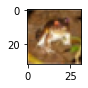

label:  [6]


In [34]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0].astype('uint8'))
plt.show()

print('label: ', y_train[0])

개구리 이미지였습니다. 그렇다면 레이블인 6은 무엇을 의미할까요?

사실 CIFAR-10 데이터 셋에는 10가지 클래스의 이미지들이 담겨있습니다. 

클래스들은 순서대로 다음과 같습니다.

```python
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```

0번 인덱스 이미지는 6번 클래스, 즉 개구리라는 뜻이었습니다.  

이번에는 각 클래스당 5개정도 씩 이미지를 그려보겠습니다.

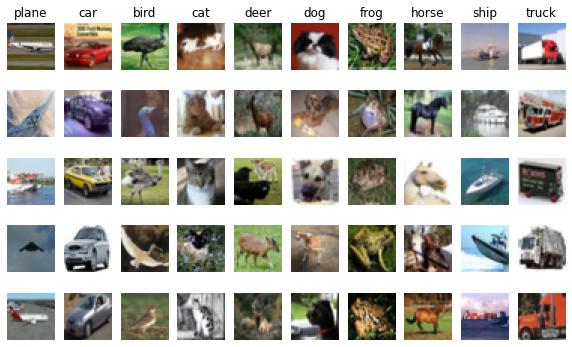

In [35]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

plt.figure(figsize=(10,6))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

위와 같은 데이터가 트레이닝 셋에 5만개, 테스트 셋에만개가 주어져있는 CIFAR-10 데이터 였습니다.

### 2.2 클래스 이진화

y_train[0] 은 6이었지만, 머신러닝 모델이 0에서 9까지 이르는 이산적 값을 직접 예측하게 하는 것은 성능이 떨어집니다. 

그러한 방법 대신 10개의 클래스마다 0과 1 사이의 값을 가지게하는 이진 벡터 방식을 더 자주 사용합니다. 

예를 들어 y_train[0]은 6이므로

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 과 같은 이진 코드로 나타냅니다. 

Keras에서는 이를 자동화해주는 API를 제공합니다.

In [41]:
# Convert class vectors to binary class matrices.
print('y_train shape (이진화 전)', y_train.shape)
print('y_train[0]:', y_train[0])

#y_train = keras.utils.to_categorical(y_train, num_classes) keras 구 버전
#y_test = keras.utils.to_categorical(y_test, num_classes) keras 구 버전
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print('y_train shape (이진화 후)', y_train.shape)
print('y_train[0]:', y_train[0])

y_train shape (이진화 전) (50000, 10, 10)
y_train[0]: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_train shape (이진화 후) (50000, 10, 10, 10)
y_train[0]: [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0

## 3. 모델 생성

이제 본격적으로 모델을 생성해보고, CIFAR-10 데이터 셋에 대해 훈련시켜보겠습니다. 

In [37]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

## 4. 모델 학습

이제 모델을 학습시켜보겠습니다.

In [38]:
opt = tf.keras.optimizers.Adam()

# 모델 생성
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9164 - accuracy: 0.3084 - val_loss: 1.8196 - val_accuracy: 0.3494
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7972 - accuracy: 0.3581 - val_loss: 1.7970 - val_accuracy: 0.3573
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7531 - accuracy: 0.3690 - val_loss: 1.7165 - val_accuracy: 0.3865
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7237 - accuracy: 0.3795 - val_loss: 1.7330 - val_accuracy: 0.3745
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7028 - accuracy: 0.3882 - val_loss: 1.7035 - val_accuracy: 0.3896
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6954 - accuracy: 0.3911 - val_loss: 1.7601 - val_accuracy: 0.3655
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6783 - accuracy: 0.3955 - val

## 5. 모델 성능 테스트

모델의 성능을 테스트해보겠습니다.

In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.6592 - accuracy: 0.4022
Test loss: 1.659212350845337
Test accuracy: 0.40220001339912415


정확도가 40% 정도되는 간단한 모델을 만들어보았습니다.

## Reference

- [cs231n](http://cs231n.github.io/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)